## Aula 07 - Regressão Linear

Até agora foram vistos alguns conceitos de classificação. Outro importante aspecto do aprendizado supervisionado são os modelos de aprendizagem para problemas de regressão. Nestes problemas, a saída esperada é contínua, em vez de valores discretos como na classificação.

Um conjunto de dados de propaganda é disponibilizado junto com esse notebook, onde cada linha indica um tipo de mercado diferente. Importe os dados para visualizar a estrutura deles:

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('ad.data', index_col=0)
display(data.head())

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
data.shape

(200, 4)

Quais são os atributos?
- **TV:** dólares gastos em propagandas veiculadas na TV para um produto em determinado mercado (em milhões)
- **Radio:** dólares gastos em propagandas veiculadas em rádio
- **Newspaper:** dólares gastos com propaganda em jornais

Qual o rótulo da amostra?
- **Sales:** vendas (em milhares) de um determinado item em um mercado específico

Para facilitar, os dados também poderiam ser visualizados para compreender melhor com a distribuição, e se há alguma tendência.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


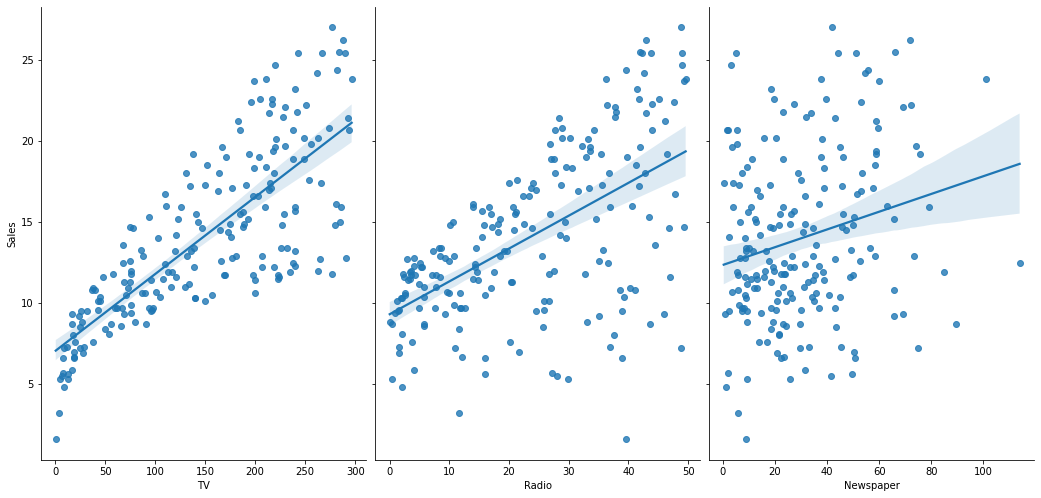

In [3]:
import seaborn as sns
%matplotlib inline

sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## Regressão Linear

Uma das formas de resolver um problema desse tipo é aplicando a regressão linear. Nesse método, procura-se uma função capaz de traçar uma linha de tendência que servirá para prever um valor futuro em determinadas condições. A vantagem é que é um modelo matematicamente simples de interpretar. A desvantagem é que dificilmente levará a uma acurácia satisfatória.

### Forma da regressão linear:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ é a saída
- $\beta_0$ é um valor de bias (deslocamento)
- $\beta_1$ é o coeficiente de $x_1$ (do primeiro atributo)
- $\beta_n$ é o coeficiente de $x_n$ (do n-ésimo atributo)

Assim, para esse problema, tem-se:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Os valores $\beta$ são chamados de **coeficientes de modelo** e são ajustados na etapa de aprendizagem, a qual acontece com o ajuste do modelo utilizando o critério dos "quadrados mínimos". Uma vez aprendidos esses parâmetros, o modelo pode ser usado de forma preditiva!

### Separando os atributos da classe

In [4]:
atributos = ['TV', 'Radio', 'Newspaper']

X = data[atributos]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [5]:
y = data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

Em seguida, é necessário dividir quais dados serão apresentados na etapa de treino e quais dados serão apresentados na etapa de teste:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1) 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

### Regressão linear no scikit-learn

In [7]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo.fit(X_train, y_train)

LinearRegression()

In [8]:
print(modelo.intercept_)
print(modelo.coef_)

2.9372157346906107
[0.04695205 0.17658644 0.00185115]


In [9]:
list(zip(atributos, modelo.coef_)) # o comando zip junta dois vetores e forma tuplas

[('TV', 0.04695204776848464),
 ('Radio', 0.1765864352681737),
 ('Newspaper', 0.0018511533188922402)]

$$y = 2.93 + 0.0469 \times TV + 0.176 \times Radio + 0.002 \times Newspaper$$

Como interpretar **o coeficiente da variável TV** (0.0469)?

Quanto mais positivo o valor, maior o impacto, quanto menor o valor (inclusive negativo), maior a contribuição na outra direção. Quando os dados estão normalizados, então para uma dada quantia gasta com de Radio e Newspaper, **um adicional de $1.000 gastos com TV** reflete diretamente na **venda de 46.6 itens**, segundo esse modelo.

### Predição

In [10]:
modelo.predict([[100,20,15]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([11.19191652])

No cenário dado, era esperado a venda de aproximadamente **11,2 milhões** de itens de produto.

### Avaliação de modelos de regressão

Métricas como acurácia são comuns em problemas de classificação, mas não se aplicam em problemas de regressão. No lugar desta, são utilizadas métricas específicas para valores contínuos.

In [11]:
true = np.array([100, 50, 30, 20])
pred = np.array([90, 50, 50, 30])

**Mean Absolute Error** (MAE) é a média absoluta dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [12]:
# calculando MAE com scikit
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0


**Mean Squared Error** (MSE) é a média do quadrado dos erros:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [13]:
# calculando MSE com scikit
print(metrics.mean_squared_error(true, pred))

150.0


**Root Mean Squared Error** (RMSE) é a raiz quadrada da média do quadrado dos erros:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [14]:
# calculando RMSE com scikit
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589


**Mean absolute percentage error** (MAPE) é a média do erro absoluto em percentual:

$$\displaystyle {\mbox{M}}={\frac {100\%}{n}}\sum _{t=1}^{n}\left|{\frac{y_i-\hat{y}_i}{y_i}}\right|$$

In [15]:
# calculando MAPE com numpy -- pq não tem no scikit :(
print(np.mean(np.abs((true - pred) / true)) * 100)

31.666666666666664


A comparação entre as diferentes métricas:

- **MAE** é a mais fácil de entender, porque é uma média.
- **MSE** é mais popular que a MAE porque pune erros maiores.
- **RMSE** é ainda mais popular porque, além das características anteriores, é interpretável em termos da variável de saída.
- **MAPE** é interpretável em termos percentual, porém é necessário tomar cuidado com a divisão por zero

### Calculando RMSE para as predições de Vendas

In [16]:
y_pred = modelo.predict(X_test)

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:',np.mean(np.abs((y_test - y_pred) / y_test)) * 100)


RMSE: 1.3888574107756972
MAPE: 8.545502795467277


### Validação Cruzada

In [18]:
from sklearn.model_selection import KFold

X = data[atributos].values
y = data.Sales.values

kf = KFold(n_splits = 10, random_state = 42, shuffle=True)

scores = []

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    #score = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    #score = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    score = modelo.score(X_test, y_test)
    scores.append(score)
    
scores = np.array(scores)

print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

R2: 0.87 (+/- 0.15)
[0.90469248 0.8946926  0.71976732 0.86420469 0.93868262 0.93194788
 0.92284837 0.8750849  0.93814699 0.74132062]


### Utilizando gradiente

(Referência: https://www.tensorflow.org/tutorials/keras/regression)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#### Normalização

In [ ]:
# as variáveis já foram separadas: X_train, X_test, y_train, y_test

normalizer = preprocessing.Normalization()
normalizer.adapt(X_train)

#### Construção da regressão

In [ ]:
model = keras.Sequential([
    normalizer,
    layers.Dense(1)
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 3)                 7         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4         
Total params: 11
Trainable params: 4
Non-trainable params: 7
_________________________________________________________________


#### O modelo não treinado tem condições de dar respostas

In [ ]:
y_pred = model.predict(X_test)

print((y_pred.reshape(-1) - y_test).mean())

-13.853687677159906


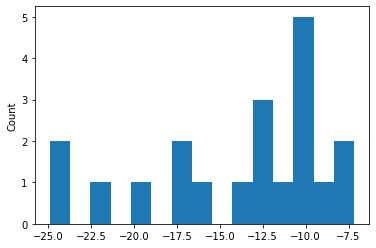

In [ ]:
error = y_pred.reshape(-1) - y_test
plt.hist(error, bins=15)
_ = plt.ylabel('Count')

#### Inserção de otimizador e função de custo

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_split = 0.2)

# verbose=0 não gera saida

Epoch 1/10
5/5 [==============================] - 0s 17ms/step - loss: 14.0727 - val_loss: 12.7970
Epoch 2/10
5/5 [==============================] - 0s 5ms/step - loss: 13.5323 - val_loss: 12.3238
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 13.0216 - val_loss: 11.8519
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 12.5090 - val_loss: 11.3947
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 12.0033 - val_loss: 10.9589
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 11.4808 - val_loss: 10.5050
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 10.9782 - val_loss: 10.0890
Epoch 8/10
5/5 [==============================] - 0s 4ms/step - loss: 10.4633 - val_loss: 9.6543
Epoch 9/10
5/5 [==============================] - 0s 4ms/step - loss: 9.9612 - val_loss: 9.2164
Epoch 10/10
5/5 [==============================] - 0s 5ms/step - loss: 9.4525 - val_loss: 8.7743


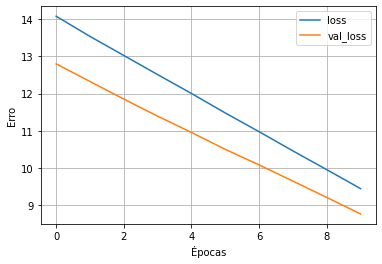

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [ ]:
y_pred = model.predict(X_test)

print((y_pred.reshape(-1) - y_test).mean())

-9.800674617290499


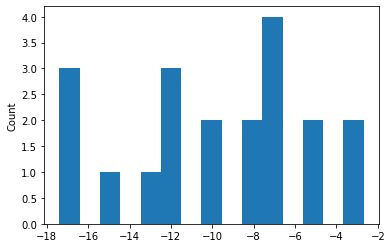

In [ ]:
error = y_pred.reshape(-1) - y_test
plt.hist(error, bins=15)
_ = plt.ylabel('Count')

#### Treinando por mais tempo

In [ ]:
# importante redefinir o modelo

model = keras.Sequential([
    normalizer,
    layers.Dense(1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split = 0.2,
    verbose=0)

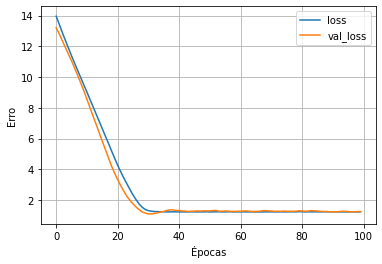

In [ ]:
plot_loss(history)

In [ ]:
y_pred = model.predict(X_test)

print((y_pred.reshape(-1) - y_test).mean())

-0.05764079093933137


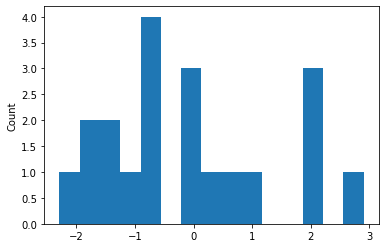

In [ ]:
error = y_pred.reshape(-1) - y_test
plt.hist(error, bins=15)
_ = plt.ylabel('Count')